Function generated 406547 results


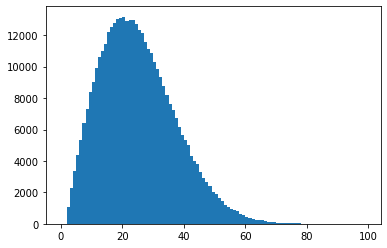

In [145]:
# Grzegorz Zaleski (418494)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Pobranie i poprawienie danych.
da = pd.read_csv('us_births_69_88.csv')
error_dates = [(day, month) for (month,day) in [(2,30), (2,31), (4,31), (6,31), (4,31), (6,31), (9,31), (11,31)]]#
da.drop([i for i in da.index if (da.loc[i, 'day'], da.loc[i, 'month']) in error_dates], inplace=True)
births_emp = np.array(da['births'])

# Liczba wiader (symbolizujacych dni w roku)
n = len(births_emp)

# Kazde wiadro bedzie V_max = 1
# Ilosc wody w kazdym wiadrze
buckets = n * births_emp/births_emp.sum() 

# W setach beda potrojne tuple:
# (Id_wiadra, Id_wiadra z ktorego przelano, aktualna ilosc wody)
overflow = set() 
underflow = set()

for i in range(n):
    if buckets[i] >= 1:
        overflow.add((i, None, buckets[i]))
    elif buckets[i] < 1:
        underflow.add((i, None, buckets[i]))
        
# Skad dane wiadro dopełniono.
full_buckets = np.arange(n)

# Przelewanie wody między wiadrami
while len(overflow) > 0 and len(underflow) > 0:
    over = overflow.pop()
    under = underflow.pop()
    
    full_buckets[under[0]] = over[0] # dopelniony kubeł
    new_over = (over[0], over[1], over[2] - 1 + under[2]) # (czesciowy) oprozniony
    
    if new_over[2] >= 1:
        overflow.add(new_over)
    else:
        underflow.add(new_over)

# Poprawienie niedokladnosci     
while len(overflow) > 0:
    over = overflow.pop()
    if over[1] == None:
        full_buckets[over[0]] = over[0]
    else:
        full_buckets[over[0]] = over[1]
    
while len(underflow) > 0:
    under = underflow.pop()
    if under[1] == None:
        full_buckets[under[0]] = under[0]
    else:
        full_buckets[under[0]] = under[1]
        
# N = liczba losowan dni do testów (rozmiar danych do analizy)
N = int(1e7)
# Tablica z wylosowanymi kubłami
days = np.random.randint(n, size = N)
# Wylosowany mark na kazdym kuble
heights = np.random.uniform(size = N)


# Wziecie odpowiednio oryginalnego albo kubla z którego przelano
days = np.where(heights <= buckets[days], days, full_buckets[days])

def sample_until_repeat_empirical_vectorized(days): #days to wektor wylosowanych dni
    results = []
    curGroup = set() #dotychczasowe_wartosci
    for new_date in days:
        if new_date in curGroup:
            results.append(len(curGroup) + 1)
            curGroup = set()
        else:
            curGroup.add(new_date)
    print('Function generated', len(results), 'results')
    return results

# Stworzenie histogramu
a = sample_until_repeat_empirical_vectorized(days);
plt.hist(a, bins = np.arange(0,100,1));